# **Analyzing and Predicting K-Drama Trends based on Top 250 Performing Series**

In this data science project, we will analyze the top 250 performing K-drama series to identify trends and patterns in relation to their ratings. We will use various data analysis techniques to extract insights from the data, such as identifying the most popular genres, tags, casts, air times, networks, and content ratings, as well as the factors that contribute to a series' success. Based on this analysis, we will develop a predictive model to forecast the popularity of future K-drama series. The goal of this project is to provide valuable insights for the K-drama industry and help content creators and broadcasters to better understand and target their audience.

**The questions we seek to answer in the Exploratory Data Analysis portion are:**
1. What is the average rating of K-Dramas per year?
2. Which networks garnered the highest and lowest average ratings?
3. Which production companies achieved the highest and lowest average ratings?
4. Which genres are the most popular? least popular?
5. Which actors and/or actresses rank high? rank low?
6. Which directors rank high? rank low?
7. What were the top performing years for K-Dramas?
8. Is there a correlation between episode duration and ratings? 
9. Is there a connection between episode number and ratings?

# **Setup**
Next cell imports all Python libraries needed for the project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats

# **Import all datasets**
Each import will be showing its first 5 rows of data as a preview.

In [2]:
kdrama_data = pd.read_csv("../data/kdrama.csv")
kdrama_data.head()

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5


# **Data Preprocessing**
Transforming data and checking for missing values in the dataset.

In [3]:
# Check if there are any missing values

kdrama_nan_count = kdrama_data.isna().sum()
kdrama_nan_count

Name                    0
Aired Date              0
Year of release         0
Original Network        0
Aired On                0
Number of Episodes      0
Duration                0
Content Rating          5
Rating                  0
Synopsis                0
Genre                   0
Tags                    0
Director                1
Screenwriter            1
Cast                    0
Production companies    2
Rank                    0
dtype: int64

In [4]:
# Replace content rating with number representations.

kdrama_data["Content Rating"] = kdrama_data["Content Rating"] \
                                .map({'G - All Ages': 1,
                                    '13+ - Teens 13 or older':2, 
                                    '15+ - Teens 15 or older':3,
                                    '18+ Restricted (violence & profanity)':4})
kdrama_data.head()

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,4.0,9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,3.0,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,3.0,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,3.0,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,3.0,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5


In [5]:
# Apply One Hot Encoding to genres to transform it from categorical to a binary vector representation.

kdrama_data["Genre"] = kdrama_data["Genre"].apply(lambda value: value.split(","))
kdrama_data["Genre"] = kdrama_data["Genre"].apply(lambda genre_list: list(map(str.strip, genre_list)))
kdrama_genres = pd.get_dummies(kdrama_data["Genre"].apply(pd.Series) \
                                                 .stack()) \
                                                 .groupby(level=0) \
                                                 .sum()
kdrama_data = pd.concat([kdrama_data, kdrama_genres], axis=1)
kdrama_data.head()

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,...,Political,Psychological,Romance,School,Sci-Fi,Sitcom,Sports,Supernatural,Thriller,Youth
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,4.0,9.2,Geu Roo is a young autistic man. He works for ...,...,0,0,0,0,0,0,0,0,0,0
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,3.0,9.1,Although Baek Hee Sung is hiding a dark secret...,...,0,0,1,0,0,0,0,0,1,0
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,3.0,9.1,The stories of people going through their days...,...,0,0,1,0,0,0,0,0,0,0
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,3.0,9.1,Everyday is extraordinary for five doctors and...,...,0,0,1,0,0,0,0,0,0,0
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,3.0,9.1,Park Dong Hoon is a middle-aged engineer who i...,...,0,1,0,0,0,0,0,0,0,0


In [6]:
# Apply One Hot Encoding to air times to transform it from categorical to a binary vector representation.

kdrama_data["Aired On"] = kdrama_data["Aired On"].apply(lambda value: value.split(","))
kdrama_data["Aired On"] = kdrama_data["Aired On"].apply(lambda air_day: list(map(str.strip, air_day)))
kdrama_air_days = pd.get_dummies(kdrama_data["Aired On"].apply(pd.Series) \
                                                 .stack()) \
                                                 .groupby(level=0) \
                                                 .sum()
kdrama_air_days = kdrama_air_days[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]]
kdrama_data = pd.concat([kdrama_data, kdrama_air_days], axis=1)
kdrama_data.head()

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,...,Supernatural,Thriller,Youth,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Move to Heaven,"May 14, 2021",2021,Netflix,[Friday],10,52 min.,4.0,9.2,Geu Roo is a young autistic man. He works for ...,...,0,0,0,0,0,0,0,1,0,0
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"[Wednesday, Thursday]",16,1 hr. 10 min.,3.0,9.1,Although Baek Hee Sung is hiding a dark secret...,...,0,1,0,0,0,1,1,0,0,0
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",[Thursday],12,1 hr. 30 min.,3.0,9.1,The stories of people going through their days...,...,0,0,0,0,0,0,1,0,0,0
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",[Thursday],12,1 hr. 40 min.,3.0,9.1,Everyday is extraordinary for five doctors and...,...,0,0,0,0,0,0,1,0,0,0
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"[Wednesday, Thursday]",16,1 hr. 17 min.,3.0,9.1,Park Dong Hoon is a middle-aged engineer who i...,...,0,0,0,0,0,1,1,0,0,0


In [7]:
# Rename columns to a better format which is without spaces

kdrama_data.columns = kdrama_data.columns.str.replace(' ', '_')
kdrama_data.columns

Index(['Name', 'Aired_Date', 'Year_of_release', 'Original_Network', 'Aired_On',
       'Number_of_Episodes', 'Duration', 'Content_Rating', 'Rating',
       'Synopsis', 'Genre', 'Tags', 'Director', 'Screenwriter', 'Cast',
       'Production_companies', 'Rank', 'Action', 'Adventure', 'Business',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Food', 'Friendship',
       'Historical', 'Horror', 'Law', 'Life', 'Medical', 'Melodrama',
       'Military', 'Music', 'Mystery', 'Political', 'Psychological', 'Romance',
       'School', 'Sci-Fi', 'Sitcom', 'Sports', 'Supernatural', 'Thriller',
       'Youth', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday'],
      dtype='object')

In [8]:
# Transform duration to minutes 

kdrama_data["Duration"] = kdrama_data["Duration"].str.replace('hr.', 'h', regex=True)
kdrama_data["Duration"] = kdrama_data["Duration"].str.replace('min.', 'm', regex=True)
kdrama_data["Duration"] = kdrama_data["Duration"].str.replace(' ', '', regex=True)
kdrama_data["Duration_mins"] = pd.to_timedelta(kdrama_data["Duration"])
kdrama_data["Duration_mins"] = kdrama_data["Duration_mins"].dt.total_seconds().div(60)
kdrama_data.head()

,Name,Aired_Date,Year_of_release,Original_Network,Aired_On,Number_of_Episodes,Duration,Content_Rating,Rating,Synopsis,...,Thriller,Youth,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Duration_mins
0,Move to Heaven,"May 14, 2021",2021,Netflix,[Friday],10,52m,4.0,9.2,Geu Roo is a young autistic man. He works for ...,...,0,0,0,0,0,0,1,0,0,52.0
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"[Wednesday, Thursday]",16,1h10m,3.0,9.1,Although Baek Hee Sung is hiding a dark secret...,...,1,0,0,0,1,1,0,0,0,70.0
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",[Thursday],12,1h30m,3.0,9.1,The stories of people going through their days...,...,0,0,0,0,0,1,0,0,0,90.0
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",[Thursday],12,1h40m,3.0,9.1,Everyday is extraordinary for five doctors and...,...,0,0,0,0,0,1,0,0,0,100.0
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"[Wednesday, Thursday]",16,1h17m,3.0,9.1,Park Dong Hoon is a middle-aged engineer who i...,...,0,0,0,0,1,1,0,0,0,77.0


In [9]:
# Drop columns that are irrelevant to analysis and model training

kdrama_data = kdrama_data.drop(['Aired_Date', 'Duration', 'Synopsis', "Genre", "Aired_On", "Tags", "Screenwriter", "Rank"], axis=1)
kdrama_data.head()

,Name,Year_of_release,Original_Network,Number_of_Episodes,Content_Rating,Rating,Director,Cast,Production_companies,Action,...,Thriller,Youth,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Duration_mins
0,Move to Heaven,2021,Netflix,10,4.0,9.2,Kim Sung Ho,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",0,...,0,0,0,0,0,0,1,0,0,52.0
1,Flower of Evil,2020,tvN,16,3.0,9.1,"Kim Chul Gyu, Yoon Jong Ho","Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,0,...,1,0,0,0,1,1,0,0,0,70.0
2,Hospital Playlist,2020,"Netflix, tvN",12,3.0,9.1,Shin Won Ho,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",0,...,0,0,0,0,0,1,0,0,0,90.0
3,Hospital Playlist 2,2021,"Netflix, tvN",12,3.0,9.1,Shin Won Ho,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",0,...,0,0,0,0,0,1,0,0,0,100.0
4,My Mister,2018,tvN,16,3.0,9.1,"Kim Won Suk, Kim Sang Woo","Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,0,...,0,0,0,0,1,1,0,0,0,77.0


In [10]:
# Filling NaN values in Director, Production Company and Screenwriter with Unknown since they are cannot be solved through logistic regression.
# We also fill NaN values in Content Rating using the mean.

kdrama_data["Director"] = kdrama_data["Director"].fillna("Unknown")
kdrama_data["Production_companies"] = kdrama_data["Production_companies"].fillna("Unknown")
kdrama_data["Content_Rating"] = kdrama_data["Content_Rating"].fillna(int(kdrama_data["Content_Rating"].mean()))
kdrama_nan_count = kdrama_data.isna().sum().sum()
print(f"There are {kdrama_nan_count} NaN values.")

There are 0 NaN values.


In [11]:
# Drop all additional networks, casts, directors, and production companies in the respective columns

def drop_additional(column):
    column = column.apply(lambda value: value.split(","))
    column = column.apply(lambda value: list(map(str.strip, value))[0])
    return column

kdrama_data["Original_Network"] = drop_additional(kdrama_data["Original_Network"])
kdrama_data["Cast"] = drop_additional(kdrama_data["Cast"])
kdrama_data["Director"] = drop_additional(kdrama_data["Director"])
kdrama_data["Production_companies"] = drop_additional(kdrama_data["Production_companies"])
kdrama_data.head()

,Name,Year_of_release,Original_Network,Number_of_Episodes,Content_Rating,Rating,Director,Cast,Production_companies,Action,...,Thriller,Youth,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Duration_mins
0,Move to Heaven,2021,Netflix,10,4.0,9.2,Kim Sung Ho,Lee Je Hoon,Page One Film,0,...,0,0,0,0,0,0,1,0,0,52.0
1,Flower of Evil,2020,tvN,16,3.0,9.1,Kim Chul Gyu,Lee Joon Gi,Monster Union,0,...,1,0,0,0,1,1,0,0,0,70.0
2,Hospital Playlist,2020,Netflix,12,3.0,9.1,Shin Won Ho,Jo Jung Suk,Egg Is Coming,0,...,0,0,0,0,0,1,0,0,0,90.0
3,Hospital Playlist 2,2021,Netflix,12,3.0,9.1,Shin Won Ho,Jo Jung Suk,Egg Is Coming,0,...,0,0,0,0,0,1,0,0,0,100.0
4,My Mister,2018,tvN,16,3.0,9.1,Kim Won Suk,Lee Sun Kyun,Chorokbaem Media,0,...,0,0,0,0,1,1,0,0,0,77.0


# **Plots and Analysis**

 ### 1. What is the average rating of K-Dramas per year?

(7.300000000000001, 10.0)

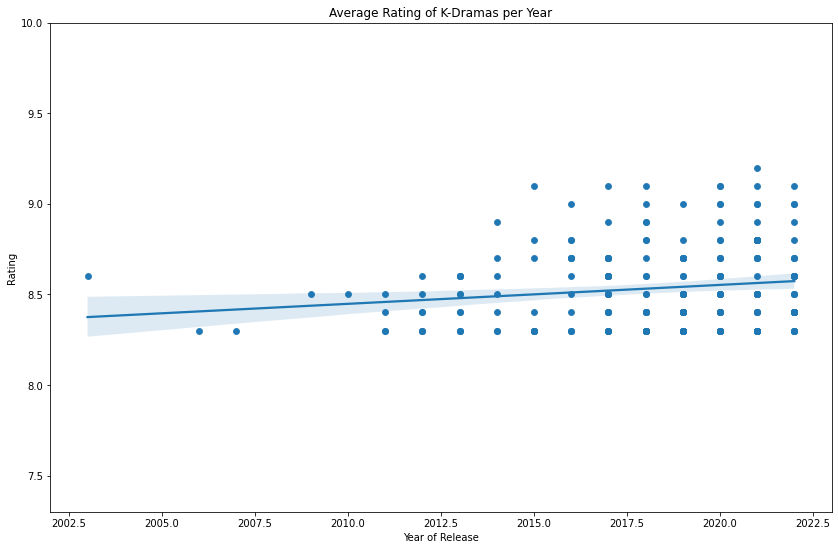

In [12]:
# Plot the averages per year for the top 250

plt.figure(figsize=(14,9))
plt.title("Average Rating of K-Dramas per Year")
g = sns.scatterplot(data=kdrama_data, x="Year_of_release", y="Rating")
sns.regplot(data=kdrama_data, x="Year_of_release", y="Rating")
g.set_xlabel("Year of Release")
g.set_xlim(2002, 2023)
g.set_ylim(min(kdrama_data["Rating"]) - 1, 10)

In [13]:
# Calculate slope of the regression line to see rate of change

slope, intercept, r_value, p_value, std_err = stats.linregress(x=kdrama_data["Year_of_release"], y=kdrama_data["Rating"])
print(f"The graph changes at a rate of {slope*100}%.")

The graph changes at a rate of 1.0447630704668633%.


From 2002 - 2023, average K-Drama ratings go up by around 1.04% annually. This is attributed to the rise of the *Hallyu* wave in the recent decade.

### 2. Which networks garnered the highest and lowest average ratings?

In [14]:
# Calculating mean rating per network

means_per_network = kdrama_data.groupby("Original_Network")["Rating"].mean().sort_values(ascending=False)
means_per_network

Original_Network
ENA              8.750000
Wavve            8.750000
Netflix          8.700000
SBS              8.535484
tvN              8.534000
jTBC             8.529167
ViuTV            8.500000
MBC              8.474194
KBS2             8.471429
OCN              8.470000
Hulu             8.450000
iQiyi            8.425000
Disney+          8.400000
Daum Kakao TV    8.400000
Apple TV+        8.400000
MBN              8.300000
Naver TV Cast    8.300000
Channel A        8.300000
TV Chosun        8.300000
Viki             8.300000
YouTube          8.300000
Name: Rating, dtype: float64

Text(0.5, 0, 'Network Name')

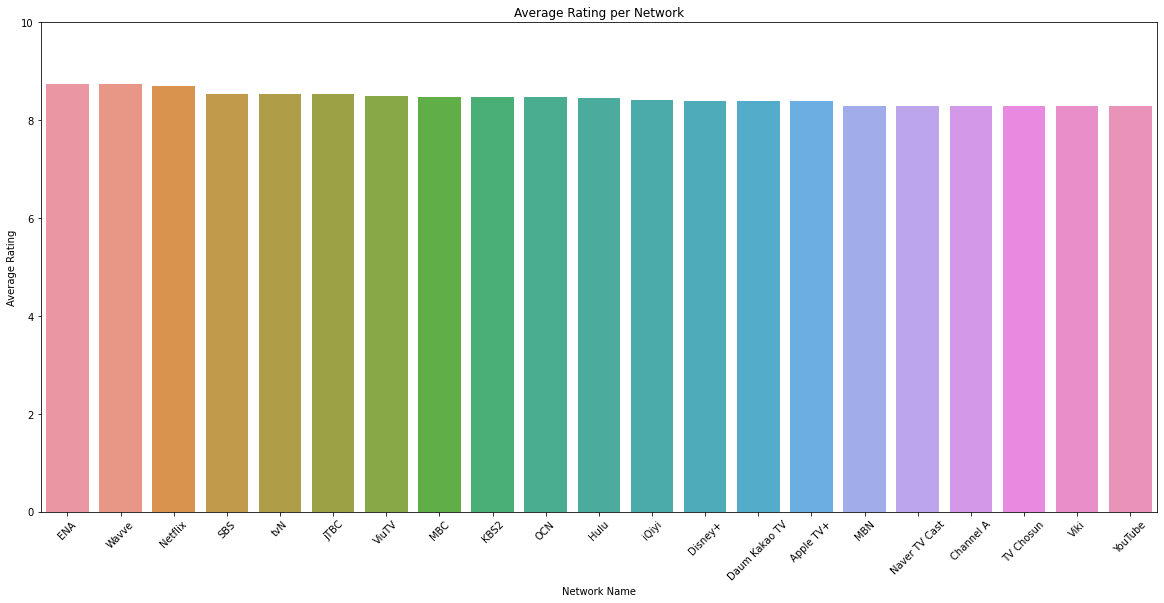

In [16]:
# Plotting to a barplot the mean rating per network
# TODO: Plot number of hits per network

plt.figure(figsize=(20,9))
plt.title("Average Rating per Network")
plt.xticks(rotation=45)
g = sns.barplot(x=means_per_network.index, y=means_per_network.values)
g.set_ylim(0, 10)
g.set_ylabel("Average Rating")
g.set_xlabel("Network Name")